Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Odoevkiy Ivan"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        summ = 0
        for j in range(len(self.yk)):
            chisl=1; znam=1
            for i in range(len(self.xk)):
                if i==j:
                    continue  
                else: 
                    chisl*=x-self.xk[i]
                    znam*=self.xk[j]-self.xk[i]
            summ+=self.yk[j]*chisl/znam
        return summ
    
    

        

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


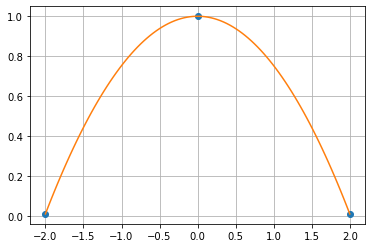

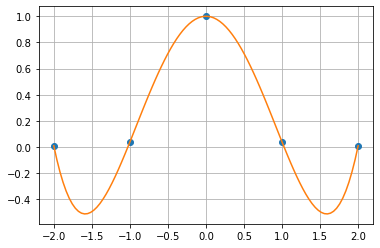

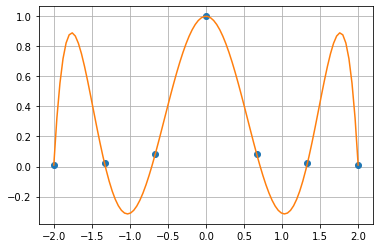

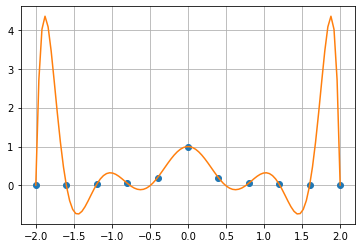

In [4]:
import matplotlib.pyplot as plt
m=[3,5,7,11]
for i in range(4):
    xx = np.linspace(-2, 2, m[i])
    yy = runge_func(xx)
    lagr = LagrangeInterpolator(xx, yy)
    xnew = np.linspace(-2,2,100)
    ynew = lagr(xnew)
    plt.plot(xx,yy,'o',xnew,ynew)
    plt.grid()
    plt.show()


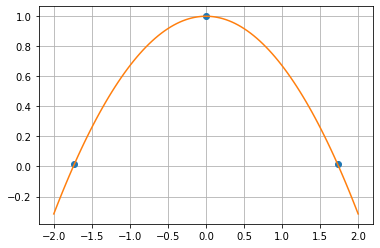

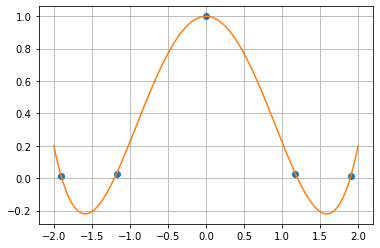

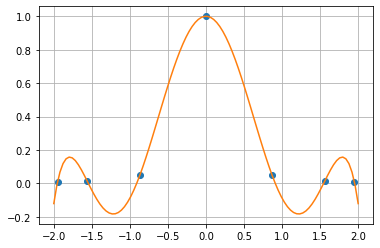

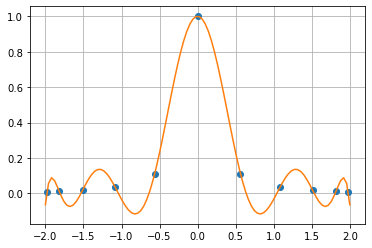

In [5]:
def chebyshev_nodes(a, b, n):
    nodes = []
    for i in range(n):
        x = 0.5*(a+b) + 0.5*(b-a)*np.cos((2*i+1)*np.pi/(2*n))
        nodes.append(x)       
    return np.array(nodes)
for i in range(4):
    cheb = chebyshev_nodes(-2, 2, m[i])
    yy = runge_func(cheb)
    lagr = LagrangeInterpolator(cheb, yy)
    xnew = np.linspace(-2,2,100)
    ynew = lagr(xnew)
    plt.plot(cheb,yy,'o',xnew,ynew)
    plt.grid()
    plt.show()